In [1]:
import pandas as pd
from pathlib import Path
import os

def get_dataset_reference():
    current_folder = Path(os.getcwd())
    model_folder = current_folder.parent
    webscrapping_folder = model_folder.parent
    return Path(webscrapping_folder, "matches", "datasets")

In [2]:
filename = "5000.csv"
df = pd.read_csv(f"{get_dataset_reference()}\\{filename}")
df

,RegularTime,SpikeTime,MapName,FinalWinner,RoundID,MatchID,RoundNumber,RoundTime,ATK_loadoutValue,ATK_weaponValue,...,DEF_remainingCreds,DEF_operators,DEF_Initiator,DEF_Duelist,DEF_Sentinel,DEF_Controller,Team_A_ID,Team_A_Name,Team_B_ID,Team_B_Name
0,0,0,Split,1,107567,6197,1,0,3900,0,...,0,0,1,2,1,1,279,Luminosity Gaming,32,Equinox Esports
1,15,0,Split,1,107567,6197,1,15494,3900,0,...,0,0,1,2,1,0,279,Luminosity Gaming,32,Equinox Esports
2,16,0,Split,1,107567,6197,1,16500,3900,0,...,0,0,1,1,1,0,279,Luminosity Gaming,32,Equinox Esports
3,26,0,Split,1,107567,6197,1,25999,3900,0,...,0,0,1,1,0,0,279,Luminosity Gaming,32,Equinox Esports
4,32,0,Split,1,107567,6197,1,32331,3900,0,...,0,0,0,1,0,0,279,Luminosity Gaming,32,Equinox Esports
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
898184,0,7,Icebox,0,494951,31800,14,21175,8150,5300,...,100,0,1,1,1,0,4307,Project ABC,4308,Havik Esports
898185,0,8,Icebox,0,494951,31800,14,22281,4600,3200,...,100,0,1,1,1,0,4307,Project ABC,4308,Havik Esports
898186,0,9,Icebox,0,494951,31800,14,23697,2400,1600,...,100,0,1,1,1,0,4307,Project ABC,4308,Havik Esports
898187,0,18,Icebox,0,494951,31800,14,31960,0,0,...,100,0,1,1,1,0,4307,Project ABC,4308,Havik Esports


# <font color='green'>Exploratory Analysis</font>

In [ ]:
df_grouped = df.groupby(["MatchID"]).max().groupby(["MapName"]).count()
df_grouped

#### <font color='yellow'>Attack vs defense skew</font>

<AxesSubplot:>

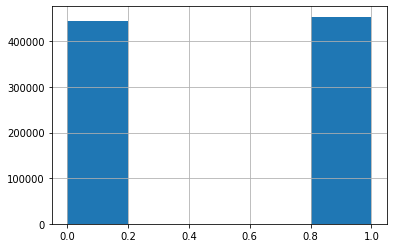

In [3]:
# Plot histogram of FinalWinner column
df.FinalWinner.hist(bins=5)

#### <font color='red'>Duelist importance on attacking side</font>

<AxesSubplot:xlabel='ATK_Duelist'>

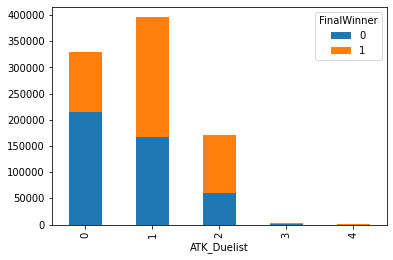

In [4]:
df.groupby(['ATK_Duelist', 'FinalWinner'])['ATK_Duelist'].count().unstack().plot(kind='bar', stacked=True)

#### <font color='yellow'>Duelist importance on defensive side</font>

<AxesSubplot:xlabel='DEF_Duelist'>

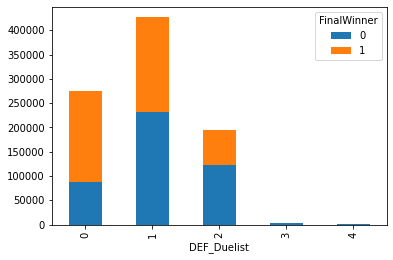

In [5]:
df.groupby(['DEF_Duelist', 'FinalWinner'])['DEF_Duelist'].count().unstack().plot(kind='bar', stacked=True)

#### <font color='red'>Controller importance on attacking side</font>

<AxesSubplot:xlabel='ATK_Controller'>

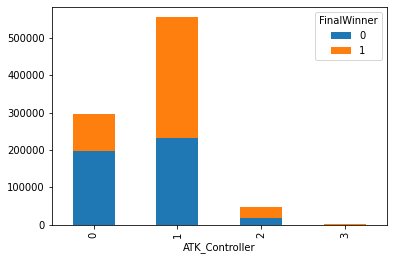

In [6]:
df.groupby(['ATK_Controller', 'FinalWinner'])['ATK_Controller'].count().unstack().plot(kind='bar', stacked=True)

#### <font color='yellow'>Controller importance on defensive side</font>

<AxesSubplot:xlabel='DEF_Controller'>

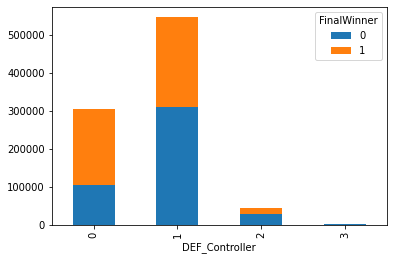

In [7]:
df.groupby(['DEF_Controller', 'FinalWinner'])['DEF_Controller'].count().unstack().plot(kind='bar', stacked=True)

#### <font color='red'>Time calculations</font>

In [8]:
time_df = df.copy()[["RegularTime", "SpikeTime", "FinalWinner"]]
time_df['RegularTimeHist'] = pd.cut(time_df['RegularTime'], 10)
time_df["SpikeTimeHist"] = pd.cut(time_df['SpikeTime'], 10)
regular_time_dict = {x: f"{int(x.left)} ~ {int(x.right)}" for x in time_df["RegularTimeHist"].unique()}
spike_time_dict = {x: f"{int(x.left)} ~ {int(x.right)}" for x in time_df["SpikeTimeHist"].unique()}

#### <font color='yellow'>Regular time win rate</font>

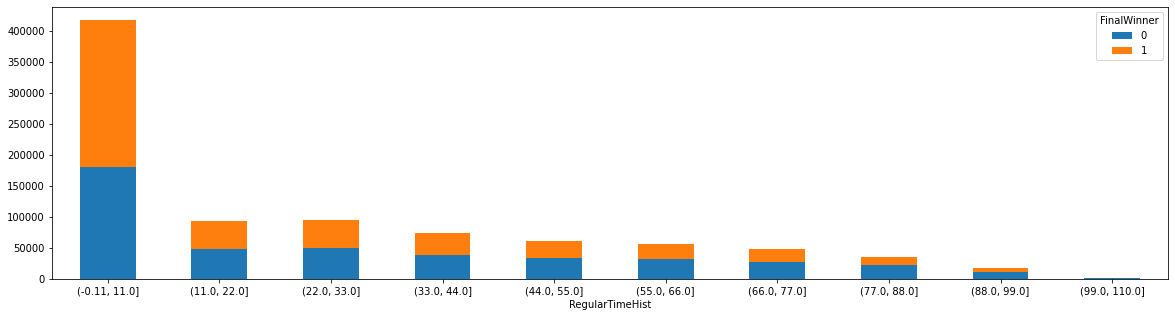

In [9]:
chosen_time = "RegularTimeHist"
regular_time_df = time_df.groupby([chosen_time, 'FinalWinner'])[chosen_time].count().unstack()
ax = regular_time_df.plot(kind='bar', stacked=True, figsize=(20,5), rot=360)

#### <font color='yellow'>Defense win rate as the regular time goes up</font>

<AxesSubplot:xlabel='Regular Time (s)'>

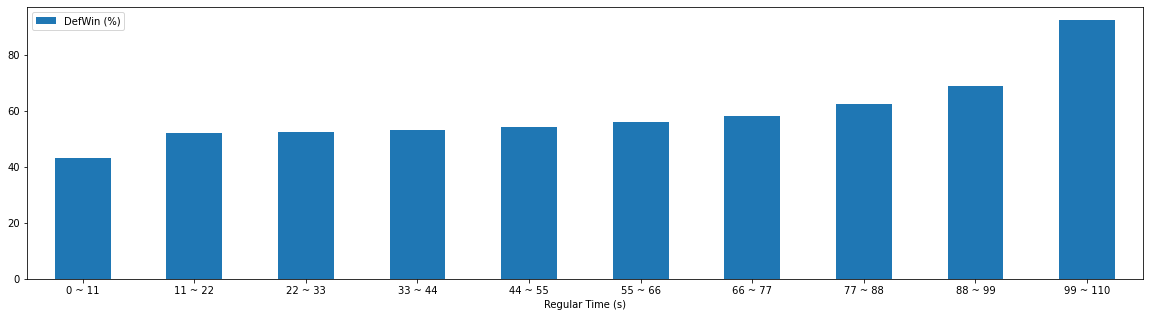

In [10]:
plain_regular_time_df = regular_time_df.reset_index()
plain_regular_time_df["DefWin (%)"] = (plain_regular_time_df[0] / (plain_regular_time_df[0] + plain_regular_time_df[1])) * 100
plain_regular_time_df["Regular Time (s)"] = [regular_time_dict[item] for item in list(regular_time_df.index)]
plain_regular_time_df.plot(x='Regular Time (s)', y='DefWin (%)', kind='bar', figsize=(20,5), rot=360)

#### <font color='yellow'>Spike time win rate</font>

<AxesSubplot:xlabel='SpikeTimeHist'>

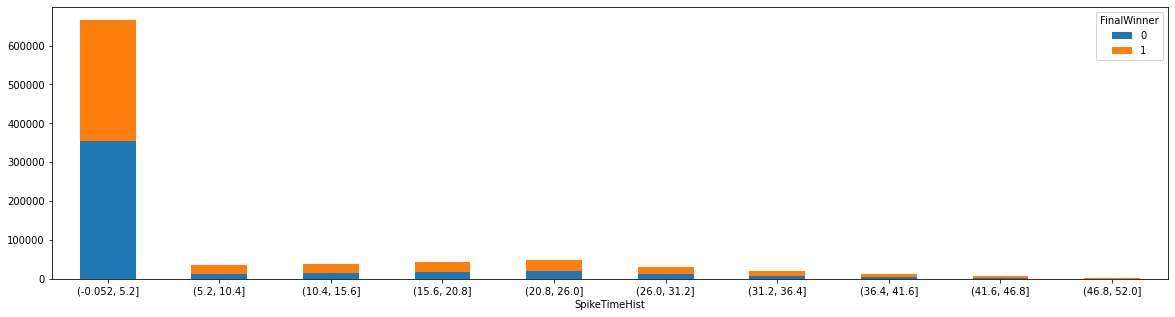

In [11]:
chosen_time = "SpikeTimeHist"
spike_time_df = time_df.groupby([chosen_time, 'FinalWinner'])[chosen_time].count().unstack()
spike_time_df.plot(kind='bar', stacked=True, figsize=(20,5), rot=360)

#### <font color='yellow'>Attackers win rate as spike time goes up</font>

<AxesSubplot:xlabel='Spike Time (s)'>

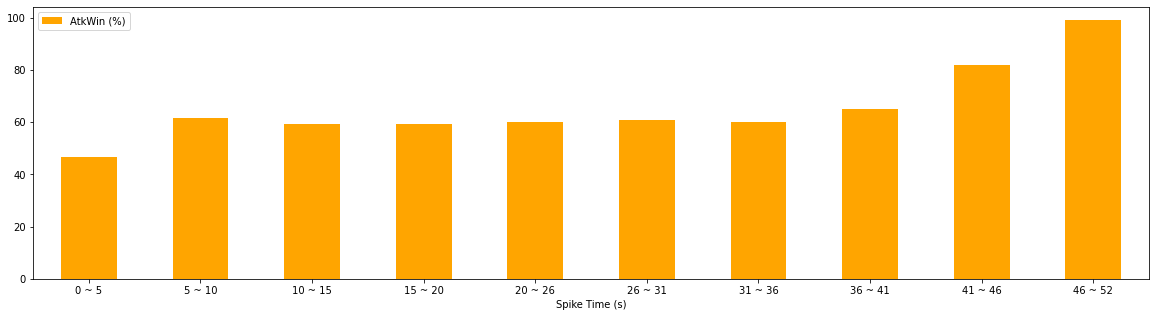

In [12]:
plain_spike_time_df = spike_time_df.reset_index()
plain_spike_time_df["AtkWin (%)"] = (plain_spike_time_df[1] / (plain_spike_time_df[0] + plain_spike_time_df[1])) * 100
plain_spike_time_df["Spike Time (s)"] = [spike_time_dict[item] for item in list(spike_time_df.index)]
plain_spike_time_df.plot(x='Spike Time (s)', y='AtkWin (%)', kind='bar', figsize=(20,5), rot=360, color="orange")

#### <font color='yellow'>Loadout diff</font>

<AxesSubplot:xlabel='Loadout diff hist'>

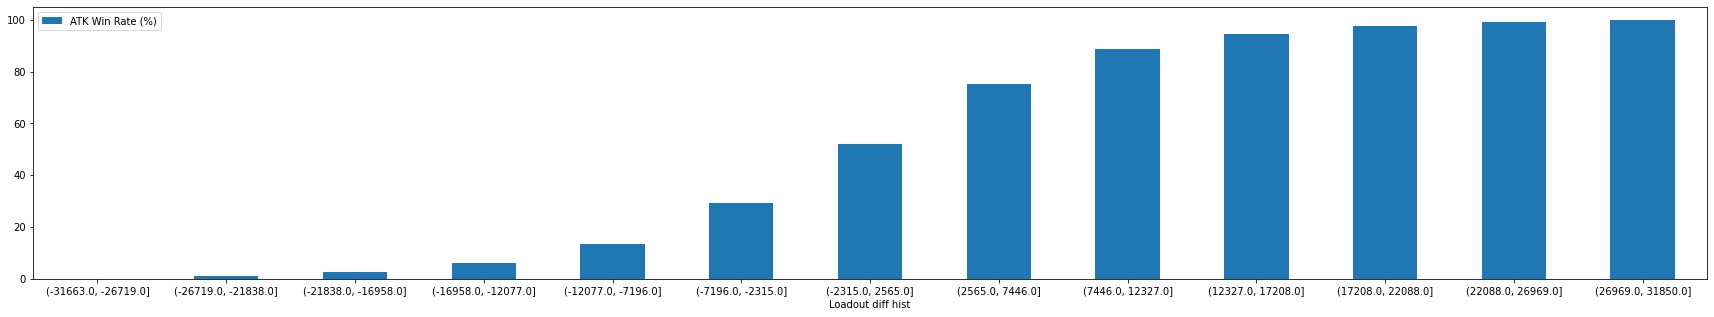

In [15]:
df["Loadout diff"] = df["ATK_loadoutValue"] - df["DEF_loadoutValue"]
df['Loadout diff hist'] = pd.cut(df['Loadout diff'], 13, precision=0)
chosen_var = "Loadout diff hist"
loadout_diff_hist = df.groupby([chosen_var, 'FinalWinner'])[chosen_var].count().unstack().reset_index()
loadout_diff_hist["ATK Win Rate (%)"] = (loadout_diff_hist[1] / (loadout_diff_hist[0] + loadout_diff_hist[1])) * 100

# Bar plot between Loadout diff hist and ATK Win Rate (%)
loadout_diff_hist.plot(x='Loadout diff hist', y='ATK Win Rate (%)', kind='bar', figsize=(30,5), rot=360)

#### <font color='yellow'>Round outcomes</font>

<AxesSubplot:>

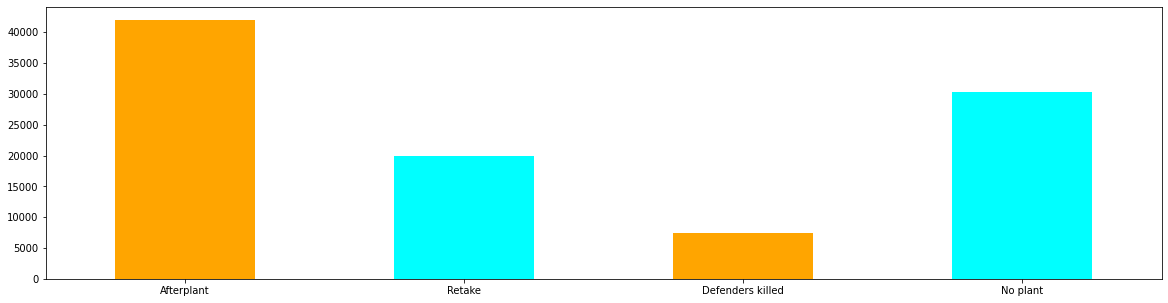

In [64]:
df["IsSpike"] = df["SpikeTime"] > 0
df["IsRegular"] = ~df["IsSpike"]
# Group by RoundID and groupby IsSpike and IsRegular
by_round = df.groupby(["RoundID"])[["IsSpike", "FinalWinner"]].max().reset_index()
# Plot by_round as a stacked bar chart using plt
total = by_round["IsSpike"].sum()
by_round["IsSpike"] = by_round["IsSpike"].astype(int)
# Create a boolean column "Afterplant" where "IsSpike" and "FinalWinner" are both 1
by_round["Afterplant"] = (by_round["IsSpike"] == 1) & (by_round["FinalWinner"] == 1)
by_round["Retake"] = (by_round["IsSpike"] == 1) & (by_round["FinalWinner"] == 0)
by_round["Defenders killed"] = (by_round["IsSpike"] == 0) & (by_round["FinalWinner"] == 1)
by_round["No plant"] = (by_round["IsSpike"] == 0) & (by_round["FinalWinner"] == 0)

# Plot bar char with Afterplant, Retake, Defenders killed and No plant
by_round_sum = by_round[["Afterplant", "Retake", "Defenders killed", "No plant"]].sum()
colors = ["Orange", "Cyan", "Orange", "Cyan"]

# Plot by_round_sum as a bar chart
by_round_sum.plot(kind='bar', stacked=True, figsize=(20,5), rot=360, color=colors)